
## 1. Lagrange's method and cubic splines exercises

Given the following data

x = [0, 1, 2] \
y = [1, 4, 3]

a) Use the Langrange interpolation method to find analytically the second order polynomial that fits the data.

b) Find the analytical expressions of the cubic splines assuming that the curvatures at the endpoints $k_0 = k_2 = 0$ are zero.

c) Find the analytical expressions of the cubic splines assuming the curvature for the left point $k_0 = 0$ to be zero and the middle point $k_1 = -5$.

d) Plot the polynomials obtained analytically in a), b) and c) and by computing the cubic splines using the numerical libraries.


### 1.(a) : Use the Langrange interpolation method to find analytically the second order polynomial that fits the data.

In [1]:
import sympy
from IPython.display import display

X = sympy.Symbol("x")
x = [0, 1, 2]
y = [1, 4, 3]

Eq = 0
for i in range(len(x)) : 
    
    l_i = 1
    for j in range(len(x)) : 
        if i != j : 
            l_i *= (X - x[j]) / (x[i] - x[j])
    
    Eq += y[i] * l_i

Eq = sympy.expand(Eq)
print("Second order polynomial using Lagrange interpolation : ")
display(Eq)


Second order polynomial using Lagrange interpolation : 


-2*x**2 + 5*x + 1

### 1.(b) : Find the analytical expressions of the cubic splines assuming that the curvatures at the endpoints $k_{0} = k_{2} = 0$ are zero.

In [2]:
import sympy
from IPython.display import display

X = sympy.Symbol("x")
k = [0, -6, 0]
x = [0, 1, 2]
y = [1, 4, 3]

for i in range(0, 2):
    expression = k[i] / 6 * (
        ((X - x[i + 1])**3) / (x[i] - x[i + 1]) 
        - (X - x[i + 1]) * (x[i] - x[i + 1])
    )
    
    expression -= k[i + 1] / 6 * (
        ((X - x[i])**3) / (x[i] - x[i + 1]) 
        - (X - x[i]) * (x[i] - x[i + 1])
    )
    
    expression += (y[i] * (X - x[i + 1]) - y[i + 1] * (X - x[i])) \
                    / (x[i] - x[i + 1])
    
    expand = sympy.expand(expression)
    numerator, denominator = sympy.fraction(expand)
    fraction = numerator / denominator
    
    display(sympy.Eq(
        sympy.Symbol(f"f_({i},{i+1})(x)"), 
        sympy.nsimplify(fraction, rational=True, tolerance=1.0e-12)
    ))



Eq(f_(0,1)(x), -x**3 + 4*x + 1)

Eq(f_(1,2)(x), x**3 - 6*x**2 + 10*x - 1)

### 1.(c) : Find the analytical expressions of the cubic splines assuming the curvature for the left point $k_{0}$ to be zero and the middle point $k_{1} = -5$ .

In [3]:
import sympy
from IPython.display import display

X = sympy.Symbol("x")
k = [0, -5, -4]
x = [0, 1, 2]
y = [1, 4, 3]

for i in range(0, 2):
    expression = k[i] / 6 * (
        ((X - x[i + 1])**3) / (x[i] - x[i + 1]) 
        - (X - x[i + 1]) * (x[i] - x[i + 1])
    )
    
    expression -= k[i + 1] / 6 * (
        ((X - x[i])**3) / (x[i] - x[i + 1]) 
        - (X - x[i]) * (x[i] - x[i + 1])
    )

    expression += (y[i] * (X - x[i + 1]) - y[i + 1] * (X - x[i])) \
                    / (x[i] - x[i + 1])
    
    expand = sympy.expand(expression)
    numerator, denominator = sympy.fraction(expand)
    fraction = numerator / denominator
    
    display(sympy.Eq(
        sympy.Symbol(f"f_({i},{i+1})(x)"),
        sympy.nsimplify(fraction, rational=True, tolerance=1.0e-12)
    ))



Eq(f_(0,1)(x), -5*x**3/6 + 23*x/6 + 1)

Eq(f_(1,2)(x), x**3/6 - 3*x**2 + 41*x/6)

### 1.(d) : Plot the polynomials obtained analytically in a), b) and c) and by computing the cubic splines using the numerical libraries.

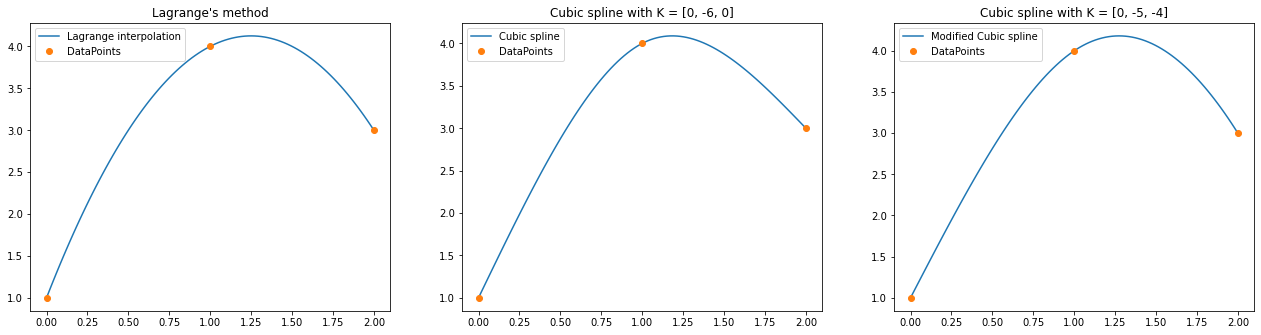

In [4]:
# plot using defined functions, Lagrange_method and Cubic_spline

import numpy as np
import matplotlib.pyplot as plt

# draw figure with 3 axes
fig = plt.figure(figsize=(5, 4))

ax_1 = fig.add_axes([0, 0, 1, 1])
ax_2 = fig.add_axes([1.2, 0, 1, 1])
ax_3 = fig.add_axes([2.4, 0, 1, 1])

axes_list = [ax_1, ax_2, ax_3]

ax_1.set_title("Lagrange's method")
ax_2.set_title("Cubic spline with K = [0, -6, 0]")
ax_3.set_title("Cubic spline with K = [0, -5, -4]")

# define given data
x_data = np.array([0, 1, 2], dtype=float)
y_data = np.array([1, 4, 3], dtype=float)

# define functions
def Lagrange(X) : 
    return -2 * X**2 + 5 * X + 1

def CubicSpline_1(X) : 
    global x_data
    front = np.where(X <= x_data[1])
    rear = np.where(X > x_data[1])
    
    fun_1 = -1 * X[front]**3 + 4 * X[front] + 1
    fun_2 = X[rear]**3 - 6 * X[rear]**2 + 10 * X[rear] - 1

    return np.concatenate((fun_1, fun_2))

def CubicSpline_2(X) : 
    global x_data
    front = np.where(X <= x_data[1])
    rear = np.where(X > x_data[1])
    
    fun_1 = -5 / 6 * X[front]**3 + 23 / 6 * X[front] + 1
    fun_2 = 1/6 * X[rear]**3 - 3 * X[rear]**2 + 41 / 6 * X[rear]

    return np.concatenate((fun_1, fun_2))

x_plot = np.linspace(min(x_data), max(x_data), 100)
y_lag = Lagrange(x_plot)
y_cubic1 = CubicSpline_1(x_plot)
y_cubic2 = CubicSpline_2(x_plot)

# plot results
ax_1.plot(x_plot, y_lag, label="Lagrange interpolation")
ax_2.plot(x_plot, y_cubic1, label="Cubic spline")
ax_3.plot(x_plot, y_cubic2, label="Modified Cubic spline")

for ax in axes_list : 
    ax.plot(x_data, y_data, 'o', label="DataPoints")
    ax.legend()


## 2.Polynomial interpolation and cubic splines.

### Program the code to find the $n^{th}$ order polynomial that interpolates the following $n + 1$ data points. 
### Then program the code to find the natural cubic splines. Plot both results with 30 interpolating points.
$
x = [0, 1, 2, 3, 4] \\
y = [0, 1, 0, 2, 0]
$

In [5]:
# find n^{th} order polynomial that interpolates n + 1 data points
# define lagrange function

import numpy as np
from numpy import ndarray

# create matrix l_i(x) of Lagrange's method with given data
def Lagrange_L(x_data : ndarray, y_data : ndarray, num=100) : 
    n = len(x_data) - 1

    L = np.zeros((n + 1, num), dtype=float) + 1
    x_lagrange = np.linspace(min(x_data), max(x_data), num=num)

    for i in range(n + 1) : 
        for j in range(n + 1) : 
            if i == j : 
                continue
            L[i] *= (x_lagrange - x_data[j]) / (x_data[i] - x_data[j])
    
    return L

# calculate polynomial using Lagrange_L function.
def Lagrange_method(x_data : ndarray, y_data : ndarray, num=100) : 
    
    n = len(x_data) - 1
    L = Lagrange_L(x_data=x_data, y_data=y_data, num=num)
    
    P_n = 0
    for i in range(n + 1) : 
        P_n += y_data[i] * L[i]

    x_lagrange = np.linspace(min(x_data), max(x_data), num=num)
    return x_lagrange, P_n.flatten()


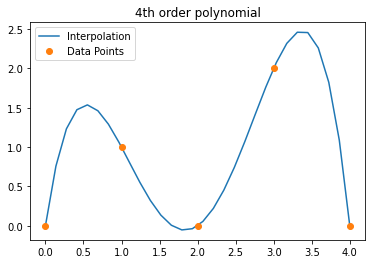

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([0, 1, 2, 3, 4], dtype=float)
y_data = np.array([0, 1, 0, 2, 0], dtype=float)

x_plot, y_plot = Lagrange_method(x_data=x_data, y_data=y_data, num=30)

plt.title("{}th order polynomial".format(len(x_data) - 1))
plt.plot(x_plot, y_plot, label="Interpolation")
plt.plot(x_data, y_data, 'o', label="Data Points")
plt.legend()
plt.show()

In [7]:
# define LUdecomp function to solve lienar equations
# L is lower triangular matrix and U is upper triangular matrix

import numpy as np
from numpy import ndarray

# decompose matrix A to LU (A = LU) using Doolitetle's decomposition. returns L and U.
def LUdecomp(A : ndarray) : 
    
    n = len(A)
    A = A.astype(dtype=float)
    L = np.eye(N=n, dtype=float)

    for i in range(n) : 
        for j in range(i + 1, n) : 
            portion = A[j,i] / A[i,i]
            A[j] -= portion * A[i]
            L[j,i] = portion
    
    U = A
    
    return L, U

# excute forward substitution with given matrix (L and B). 
# retunrs solution Y that satisfy LY = B.
def forward_sub(L : ndarray, B : ndarray) : 
    
    n = len(L)
    X = np.zeros(B.shape, dtype=float)
    
    for i in range(n) : 
        X[i] = (B[i] - L[i, :i] @ X[:i]) / L[i,i]

    return X

# excute forward substitution with given matrix (U and Y). 
# retunrs solution X that satisfy UX = Y.
def backward_sub(U : ndarray, Y : ndarray) : 
    n = len(U)
    X = np.zeros(Y.shape, dtype=float)
    
    for i in range(n-1, -1, -1) : 
        X[i] = (Y[i] - U[i, i+1:] @ X[i+1:]) / U[i,i]

    return X

# solve the linear equation AX = B by using LU decomposition. returns solution X.
def LUdecomp_solve(A : ndarray, B : ndarray) : 
    
    L, U = LUdecomp(A=A)
    Y = forward_sub(L=L, B=B)
    X = backward_sub(U=U, Y=Y)

    return X


In [8]:
# define Cubic spline functions to solve problems
# if Ludecomp functions are not implemented, it will automatically use np.linalg.solve 

import numpy as np
from numpy import ndarray

# generate matrix that satisfy AK = B, where K = [k0, k1, ..., kn], 
# with given data (x_data and y_data). returns A and B.
def Cubic_matrix_gen(x_data : ndarray, y_data : ndarray) : 
    
    n = len(x_data)
    A = np.zeros((n,n), dtype=float)
    B = np.zeros((n,1), dtype=float)

    for i in range(1, n - 1) : 
        A[i, i - 1] = x_data[i - 1] - x_data[i]
        A[i, i] = 2 * (x_data[i - 1] - x_data[i + 1])
        A[i, i + 1] = x_data[i] - x_data[i + 1]
        B[i] = ((y_data[i - 1] - y_data[i])/(x_data[i - 1] - x_data[i])) \
                - ((y_data[i] - y_data[i + 1]) / (x_data[i] - x_data[i + 1]))
        B[i] *= 6
    
    return A, B

# solve the equation AK = B using Cubic_matrix_gen function, 
# where K = [0, k1, k2, ..., kn-1, 0]. returns K. --> NATURAL CUBIC SPLINE
# if K was given like K = [condition1, ..., Nan, ..., condition2, ..., Nan], 
# solve Nan values with conditions and returns K
def Cubic_K_solve(x_data : ndarray, y_data : ndarray, K=None) : 
    
    A, B = Cubic_matrix_gen(x_data=x_data, y_data=y_data)
    n = len(A)
    if K is None : 
        K = np.zeros(B.shape, dtype=float)
        try : 
            K[1:n-1] = LUdecomp_solve(A=A[1:n-1, 1:n-1], B=B[1:n-1])
        except : 
            K[1:n-1] = np.linalg.solve(A[1:n-1, 1:n-1], B[1:n-1])
    
    else : 
        if type(K) == type(list()) : 
            K = np.array(K)
        
        nan_index = np.where(K == None)
        cond_index = np.where(K != None)

        K_temp = K.astype(float)
        K_temp[nan_index] = 0

        B = B - A[:, cond_index] @ K_temp[cond_index]

        try : 
            K_temp = LUdecomp_solve(
                A=np.delete(A, cond_index, axis=1)[1:n-1],
                B=B[1:n-1]
            )
        except : 
            K_temp = np.linalg.solve(
                np.delete(A, cond_index, axis=1)[1:n-1],
                B[1:n-1]
            )
        
        for index, solution in zip(nan_index, K_temp) : 
            K[index] = solution
    
    return K.flatten()

# calculate f(x)_{i,i+1} where i = 0, 1, ..., n-1 by given data.
# if K=None, K will be the solution that satisfy AK = B, where K = [0, k1, k2, ..., kn-1, 0].
# if not, function will calculate f(x) by given K.
def Cubic_spline(x_data : ndarray, y_data : ndarray, K=None, num=100) : 
    
    if K is None or (None in K): 
        K = Cubic_K_solve(x_data=x_data, y_data=y_data, K=K)

    n = len(x_data)

    x_range = np.linspace(min(x_data), max(x_data), num=num)
    y_spline = np.zeros((num), dtype=float)
    for i in range(n-1) : 
        h = x_data[i] - x_data[i + 1]
        xi = x_data[i]
        xi1 = x_data[i + 1]

        valid_index = np.where(((xi <= x_range) & (x_range < xi1)))
        
        x_spline = x_range[valid_index]
        
        y_spline[valid_index] = K[i] / 6 * (
            ((x_spline - xi1)**3) / h 
            - (x_spline - xi1) * h
        )
        y_spline[valid_index] -= K[i + 1] / 6 * (
            ((x_spline - xi)**3) / h 
            - (x_spline - xi) * h
        )
        y_spline[valid_index] += (
            y_data[i] * (x_spline - xi1) - y_data[i + 1] * (x_spline - xi)
        ) / h
    
    return x_range, y_spline.flatten()


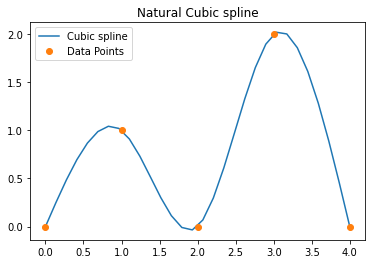

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([0, 1, 2, 3, 4], dtype=float)
y_data = np.array([0, 1, 0, 2, 0], dtype=float)

x_plot, y_plot = Cubic_spline(x_data=x_data, y_data=y_data, K=None, num=30)

plt.title("Natural Cubic spline")
plt.plot(x_plot, y_plot, label="Cubic spline")
plt.plot(x_data, y_data, 'o', label="Data Points")
plt.legend()
plt.show()

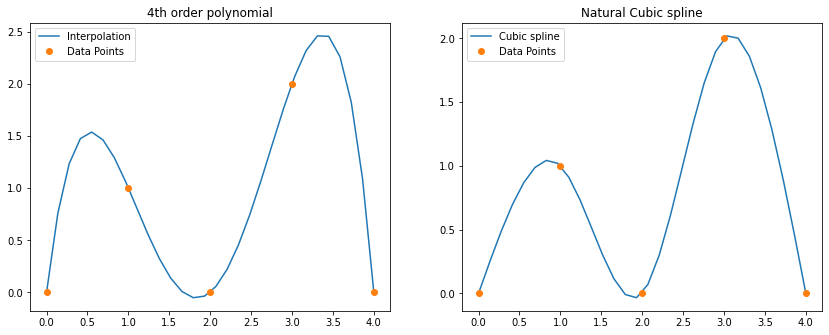

In [10]:
# plot both

import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([0, 1, 2, 3, 4], dtype=float)
y_data = np.array([0, 1, 0, 2, 0], dtype=float)

x_lag, y_lag = Lagrange_method(x_data=x_data, y_data=y_data, num=30)
x_cubic, y_cubic = Cubic_spline(x_data=x_data, y_data=y_data, K=None, num=30)

fig = plt.figure(figsize=(5, 4))
ax_1 = fig.add_axes([0, 0, 1, 1])
ax_2 = fig.add_axes([1.2, 0, 1, 1])

ax_1.set_title("{}th order polynomial".format(len(x_data) - 1))
ax_1.plot(x_lag, y_lag, label="Interpolation")
ax_1.plot(x_data, y_data, 'o', label="Data Points")
ax_1.legend()

ax_2.set_title("Natural Cubic spline")
ax_2.plot(x_cubic, y_cubic, label="Cubic spline")
ax_2.plot(x_data, y_data, 'o', label="Data Points")
ax_2.legend()


Are Lagrange functions close enough? : [True]
Are Natural cubic splines close enough? : [True]


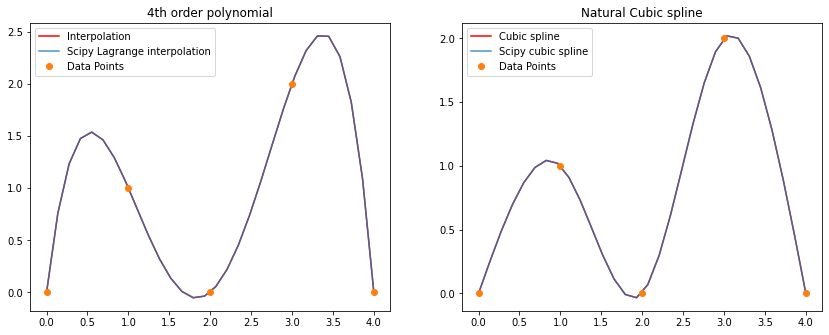

In [11]:
# comparison with Scipy modules

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline
from numpy.polynomial.polynomial import Polynomial

x_data = np.array([0, 1, 2, 3, 4], dtype=float)
y_data = np.array([0, 1, 0, 2, 0], dtype=float)

# calculate datas
x_lag, y_lag = Lagrange_method(x_data=x_data, y_data=y_data, num=30)
x_cubic, y_cubic = Cubic_spline(x_data=x_data, y_data=y_data, K=None, num=30)
poly = lagrange(x_data, y_data)
cs = CubicSpline(x_data, y_data, bc_type='natural')

fig = plt.figure(figsize=(5, 4))
ax_1 = fig.add_axes([0, 0, 1, 1])
ax_2 = fig.add_axes([1.2, 0, 1, 1])

# plot ax_1
ax_1.set_title("{}th order polynomial".format(len(x_data) - 1))
ax_1.plot(x_lag, y_lag, label="Interpolation", color="r")
ax_1.plot(x_lag, Polynomial(poly.coef[::-1])(x_lag), 
          label="Scipy Lagrange interpolation", alpha=0.8)
ax_1.plot(x_data, y_data, 'o', label="Data Points")
ax_1.legend()

# plot ax_2
ax_2.set_title("Natural Cubic spline")
ax_2.plot(x_cubic, y_cubic, label="Cubic spline", color="r")
ax_2.plot(x_cubic, cs(x_cubic), label="Scipy cubic spline", alpha=0.8)
ax_2.plot(x_data, y_data, 'o', label="Data Points")
ax_2.legend()

print("Are Lagrange functions close enough? : [{}]".format(
    np.allclose(Polynomial(poly.coef[::-1])(x_lag), y_lag, rtol=1.0e-9, atol=1.0e-9)
))
print("Are Natural cubic splines close enough? : [{}]".format(
    np.allclose(cs(x_cubic), y_cubic, rtol=1.0e-9, atol=1.0e-9)
))


## 3. Use Newton's method to find the polynomial that fits the following points:

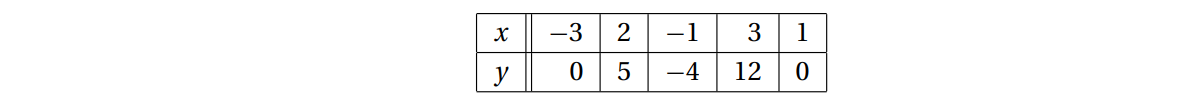

Newton's polynomials are defined as

$$P_0(x) = a_n  ~~~~ P_k(x) = a_{n-k} + (x-x_{n-k})P_{k-1}(x) , ~~~~ k=1,2,\cdots,n$$

and the coeffecients are given by:
$$a_0=y_0  ~~~~ a_1 = \triangledown y_1~~~~ a_2 = \triangledown^2 y_2 ~~~~ \cdots ~~~~
a_n = \triangledown y_n$$



$$\triangledown y_i = \frac{y_i - y_0}{x_i - x_0} ~~~~ i = 1,2,\cdots,n$$

$$\triangledown^2 y_i = \frac{\triangledown y_i - \triangledown y_1}{x_i - x_1} ~~~~ i = 2,3,\cdots,n$$

$$\triangledown^3 y_i = \frac{\triangledown y_i - \triangledown y_2}{x_i - x_2} ~~~~ i = 3,4, \cdots,n$$

$$\vdots$$

$$\triangledown y_n = \frac{\triangledown^{n-1} y_n - \triangledown^{n-1}y_{n-1}}{x_n - x_{n-1}}$$


|  |   |   |   |   |    |   |    |   |
|---|---|---|---|---|---|---|----|---|
|$x_0$|$y_0$|   |  |    |   |
|$x_1$|$y_1$|$\triangledown y_1$|  |    |   |
|$x_2$|$y_2$|$\triangledown y_2$|$\triangledown^2 y_2$|  |   |

[Tableau for Newton’s method.]

a) Find the coefficients of Newton's polynomial

b) Write the code to find the Newton's polynomial function and print the y value when $x = 0.5.$

c) Plot an interpolating polynomial between $x \in [-3, 3]$ with 20 points. Mark with
symbols the input data points and make sure that the interpolated function passes
through them.

In [12]:
# define LUdecomp function to solve lienar equations. it's same as before.
# L is lower triangular matrix and U is upper triangular matrix

import numpy as np
from numpy import ndarray

# decompose matrix A to LU (A = LU) using Doolitetle's decomposition. returns L and U.
def LUdecomp(A : ndarray) : 
    
    n = len(A)
    A = A.astype(dtype=float)
    L = np.eye(N=n, dtype=float)

    for i in range(n) : 
        for j in range(i + 1, n) : 
            portion = A[j,i] / A[i,i]
            A[j] -= portion * A[i]
            L[j,i] = portion
    
    U = A
    
    return L, U

# excute forward substitution with given matrix (L and B). 
# retunrs solution Y that satisfy LY = B.
def forward_sub(L : ndarray, B : ndarray) : 
    
    n = len(L)
    X = np.zeros(B.shape, dtype=float)
    
    for i in range(n) : 
        X[i] = (B[i] - L[i, :i] @ X[:i]) / L[i,i]

    return X

# excute forward substitution with given matrix (U and Y). 
# retunrs solution X that satisfy UX = Y.
def backward_sub(U : ndarray, Y : ndarray) : 
    n = len(U)
    X = np.zeros(Y.shape, dtype=float)
    
    for i in range(n-1, -1, -1) : 
        X[i] = (Y[i] - U[i, i+1:] @ X[i+1:]) / U[i,i]

    return X

# solve the linear equation AX = B by using LU decomposition. returns solution X.
def LUdecomp_solve(A : ndarray, B : ndarray) : 
    
    L, U = LUdecomp(A=A)
    Y = forward_sub(L=L, B=B)
    X = backward_sub(U=U, Y=Y)

    return X


In [13]:
# define Newton functions to solve problems
# if Ludecomp functions are not implemented, it will automatically use np.linalg.solve 

import numpy as np
from numpy import ndarray

# this matrix is for calculation.
# generate matrix. matrix is similar to [Tableau for Newton’s method] in above markdown, 
# except matrix[:,0]=1.
# if you want to get EXACT matrix like Tableau above, set private=False. 
# then it will return exact matrix.
def Newton_gen_polymatrix(x_data : ndarray, y_data : ndarray, private=True) : 
    
    n = len(x_data)
    Eval_matrix = np.zeros((n, n), dtype=float)
    Eval_matrix[:,0] = 1

    for column in range(1, n) : 
        for row in range(column, n) : 
            Eval_matrix[row, column] = Eval_matrix[row, column - 1] \
                                        * (x_data[row] - x_data[column - 1])
    
    if not private : 
        Eval_matrix[:,0] = y_data
    
    return Eval_matrix

# solve the lienar equation AX = B and return coefficents of interpolated polynomial.
# A is matrix generated by Newton_gen_polymatrix function, which were similar to 
# [Tableau for Newton’s method] in above markdown.
# B is same as y_data.
# so this function will solve [Polymatrix] @ [Coefficients of polynomial] = [y_data].
# [Coefficients of polynomial] = [a0, a1, ..., an]
def Newton_coefficient_solve(x_data : ndarray, y_data : ndarray) : 
    if x_data.ndim != 1 : 
        x_data = x_data.astype(float).flatten()
    if y_data.ndim != 1 : 
        y_data = y_data.astype(float).flatten()
    
    A = Newton_gen_polymatrix(x_data=x_data, y_data=y_data)
    B = np.array([y_data]).T

    try : 
        Coef_matrix = LUdecomp_solve(A=A, B=B)
    except : 
        Coef_matrix = np.linalg.solve(A, B)

    return Coef_matrix

# interpolate with given data by Newton's method.
# if x_point=[x1, x2, ... ] was given, function will return the values that 
# interpolated newton's polynomial value at point [P_n(x1), P_n(x2), ... ].
# if not, function will give you the polynomial's value between [min(x_data), max(x_data)].
def Newton_solve(x_data : ndarray, y_data : ndarray, x_point=None, num=100) : 
    
    Coef_matrix = Newton_coefficient_solve(x_data=x_data, y_data=y_data)
    
    if x_point is None : 
        x_point = np.linspace(min(x_data), max(x_data), num, dtype=float)
        num = len(x_point)

    n = len(Coef_matrix)
    
    y_newton = Coef_matrix[n - 1]
    for i in range(1, n + 1) : 
        y_newton = Coef_matrix[n - i] + (x_point - x_data[n - i]) * y_newton
    
    return y_newton



### 2.(a) : Find the coefficients of Newton's polynomial

In [14]:
import numpy as np

x_data = np.array([-3, 2, -1, 3, 1], dtype=float)
y_data = np.array([0, 5, -4, 12, 0], dtype=float)


print(
    "Cofficient of newton's polynomial : ", 
    *Newton_coefficient_solve(x_data=x_data, y_data=y_data).T
)

Cofficient of newton's polynomial :  [0. 1. 1. 0. 0.]


### 2.(b) : Write the code to find the Newton's polynomial function and print the y value when x=0.5

In [15]:
import numpy as np

x_data = np.array([-3, 2, -1, 3, 1], dtype=float)
y_data = np.array([0, 5, -4, 12, 0], dtype=float)

print(
    "newton's polynomial value y at x = 0.5 : ", 
    *Newton_solve(x_data=x_data, y_data=y_data, x_point=0.5)
)

newton's polynomial value y at x = 0.5 :  -1.75


### 2.(c) : Plot an interpolating polynomial between $x \in [-3, 3]$ with 20 points. Mark with symbols the input data points and make sure that the interpolated function passes through them.

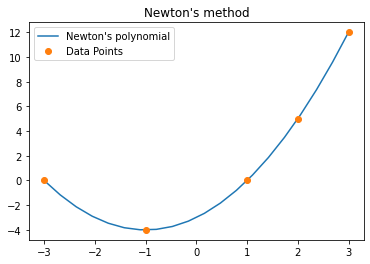

Given data points : 
x = [-3.0] --> y = [0.0]
x = [2.0]  --> y = [5.0]
x = [-1.0] --> y = [-4.0]
x = [3.0]  --> y = [12.0]
x = [1.0]  --> y = [0.0]

Newton's polynomial at given x data : 
x = [-3.0] --> y = [0.0]
x = [2.0]  --> y = [5.0]
x = [-1.0] --> y = [-4.0]
x = [3.0]  --> y = [12.0]
x = [1.0]  --> y = [0.0]


In [16]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([-3, 2, -1, 3, 1], dtype=float)
y_data = np.array([0, 5, -4, 12, 0], dtype=float)

x_plot = np.linspace(-3, 3, num=20)
y_plot = Newton_solve(x_data=x_data, y_data=y_data, x_point=x_plot)

plt.title("Newton's method")
plt.plot(x_plot, y_plot, label="Newton's polynomial")
plt.plot(x_data, y_data, 'o', label="Data Points")
plt.legend()
plt.show()

print("Given data points : ")
for x_val, y_val in zip(x_data, y_data) : 
    print("x = [{}]".format(x_val).ljust(10), "--> y = [{}]".format(y_val))
print()

print("Newton's polynomial at given x data : ")
for data_point in x_data : 
    print("x = [{}]".format(data_point).ljust(10), "--> y = [{}]".format(
        *Newton_solve(x_data=x_data, y_data=y_data, x_point=data_point)
    ))
